xの値: [0.         1.57079633 3.14159265 4.71238898 6.28318531]
yの値: [ 0.0000000e+00  1.0000000e+00  1.2246468e-16 -1.0000000e+00
 -2.4492936e-16]


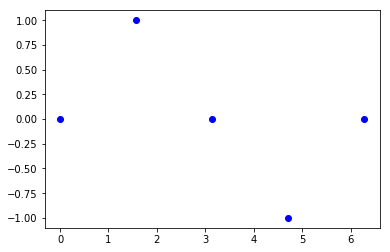

In [230]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

#サンプルデータ数の指定
n = 5
#xを0から2πまでの範囲でn分割を行う
x = np.linspace(0, 2*np.pi, n)
print('xの値:', x)
#xをsin関数に入れて出力値を変数yとする
y = np.sin(x)
print('yの値:', y)
sin = pd.Series(y, index=x)
#x,yのプロット
plt.plot(x, y, 'bo') 

[ 0.2943707   1.17413882  0.04070318 -0.8038229  -0.09270635]


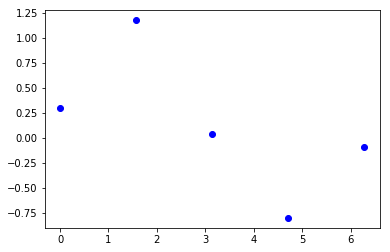

In [231]:
#ノイズありのデータを生成
noise = y + 0.3 * np.random.randn(n)

print(noise)

#オリジナルの点にノイズを加えた点のプロット
plt.plot(x, noise, 'bo') 

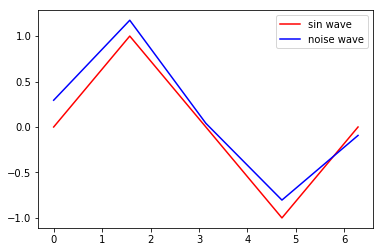

In [232]:
##ノイズなしの点とノイズ有りの点の比較
sdf = pd.DataFrame({'sin wave': sin, 'noise wave': noise})
sdf.plot(color=('r','b'))

In [233]:
#データセットを学習用とテスト用に分割
#※今回は全データを学習データに使うため、必要ないが、これはよく使う関数なめ記述
#text_size=0.0を好きな割合に変えることにより、その割合で学習データとテストデータに分割できる
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(x, noise, test_size=0.0, random_state=0)
print('x_train:', x_train)
print('y_train', y_train)

x_train: [3.14159265 0.         1.57079633 4.71238898 6.28318531]
y_train [ 0.04070318  0.2943707   1.17413882 -0.8038229  -0.09270635]


In [234]:
###多項式回帰の実装(M = 0)
#パラメータの初期化
w = np.random.rand(1)

#データの標準化を行うための準備
mu = x_train.mean()
sigma = x_train.std()
#標準化を行う関数
def standardize(x):
    return (x - mu) / sigma

#データの標準化
z_train = standardize(x_train)

#学習データを行列に変換する関数(定数項は1に設定)
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0])]).T

#学習データを行列に変換
X = to_matrix(z_train)
#変換結果の確認
print(X)

#予測関数
def f(x):
    return np.dot(x, w)

#誤差関数(損失関数)
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [235]:
#学種率を10^(-3)に設定
lr = 1e-3
#カウントを0に設定
count = 0
#最初の誤差を変数errorに代入
error = MSE(X, y_train)
print('1回目の誤差:' + str(error))

#countが2000になるまで学習を行う
while count < 2000:
    #パラメータの更新式
    w = w - lr * np.dot(f(X) - y_train, X)
    #パラメータを更新した後の誤差
    current_error = MSE(X, y_train)
    #前の誤差とパラメータを更新した後の誤差の差
    diff = error - current_error
    #誤差をパラメータ更新後の誤差に更新
    error = current_error
    count += 1
    
    if count % 100 == 0:
        #ログ
        log = '{}回目の誤差:{}'
        print(log.format(count, current_error))

1回目の誤差:0.9204877150892582
100回目の誤差:0.5968922230688113
200回目の誤差:0.4781463261965806
300回目の誤差:0.43457159054142686
400回目の誤差:0.418581500463118
500回目の誤差:0.4127138118387766
600回目の誤差:0.41056061760262097
700回目の誤差:0.4097704861359677
800回目の誤差:0.40948054121408745
900回目の誤差:0.4093741436571337
1000回目の誤差:0.40933510024139697
1100回目の誤差:0.4093207729546056
1200回目の誤差:0.4093155154446533
1300回目の誤差:0.4093135861602535
1400回目の誤差:0.4093128781942526
1500回目の誤差:0.4093126184005911
1600回目の誤差:0.40931252306727495
1700回目の誤差:0.409312488083969
1800回目の誤差:0.4093124752465713
1900回目の誤差:0.40931247053578756
2000回目の誤差:0.40931246880712885


In [236]:
#M=0のときの最終誤差
print('最終誤差:', error)

最終誤差: 0.40931246880712885


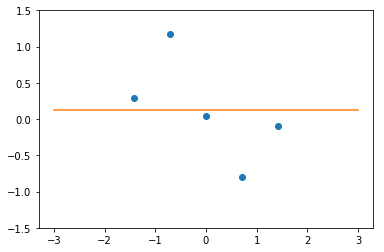

In [237]:
#M=0のときのグラフをプロット
x = np.linspace(-3, 3, 100)
plt.plot(z_train, y_train, 'o')
plt.plot(x, f(to_matrix(x)))
plt.ylim(-1.5, 1.5)
plt.show()

In [238]:
###多項式回帰の実装(M = 1)
#パラメータの初期化
w = np.random.rand(2)

#標準化
z_train = standardize(x_train)

#学習データの行列を作成(多項式のMが2のとき)
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x]).T

X = to_matrix(z_train)

#予測関数
def f(x):
    return np.dot(x, w)

#誤差関数(損失関数)
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

In [239]:
count = 0
error = MSE(X, y_train)
print('1回目の誤差:' + str(error))

while count < 2000:
    w = w - lr * np.dot(f(X) - y_train, X)
    current_error = MSE(X, y_train)
    diff = error - current_error
    error = current_error
    count += 1
    
    if count % 100 == 0:
        #ログ
        log = '{}回目の誤差:{}'
        print(log.format(count, current_error))

1回目の誤差:1.510989330670582
100回目の誤差:0.7176863900499362
200回目の誤差:0.42657767099082067
300回目の誤差:0.319753049559393
400回目の誤差:0.28055291917219377
500回目の誤差:0.2661681247139255
600回目の誤差:0.26088951187354065
700回目の誤差:0.25895248360389717
800回目の誤差:0.2582416759294469
900回目の誤差:0.2579808394935644
1000回目の誤差:0.2578851235232261
1100回目の誤差:0.2578499997992464
1200回目の誤差:0.2578371108740038
1300回目の誤差:0.25783238118207247
1400回目の誤差:0.25783064558462393
1500回目の誤差:0.25783000869356476
1600回目の誤差:0.257829774981409
1700回目の誤差:0.2578296892189054
1800回目の誤差:0.2578296577476839
1900回目の誤差:0.25782964619907306
2000回目の誤差:0.25782964196121994


In [240]:
#M=1のときの最終誤差
print('最終誤差:', error)

最終誤差: 0.25782964196121994


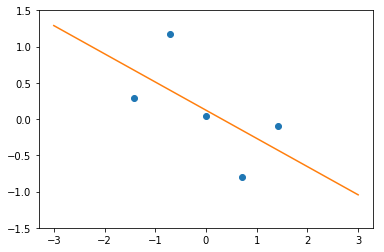

In [241]:
#M=1のときのグラフをプロット
x = np.linspace(-3, 3, 100)
plt.plot(z_train, y_train, 'o')
plt.plot(x, f(to_matrix(x)))
plt.ylim(-1.5, 1.5)
plt.show()

In [242]:
###多項式回帰の実装(M = 3)
#パラメータの初期化
w = np.random.rand(4)

train_z = standardize(x_train)

#学習データの行列を作成(多項式のMが2のとき)
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2, x ** 3]).T

X = to_matrix(z_train)

#予測関数
def f(x):
    return np.dot(x, w)

#誤差関数(損失関数)
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

In [243]:
count = 0
error = MSE(X, y_train)
print('1回目の誤差:' + str(error))

while count < 2000:
    w = w - lr * np.dot(f(X) - y_train, X)
    current_error = MSE(X, y_train)
    diff = np.abs(error - current_error)
    error = current_error
    count += 1
    
    if count % 100 == 0:
        #ログ
        log = '{}回目の誤差:{}'
        print(log.format(count, current_error))

1回目の誤差:5.428659393497469
100回目の誤差:0.4255632043892007
200回目の誤差:0.3002246957007424
300回目の誤差:0.2705005020583872
400回目の誤差:0.2466169107697208
500回目の誤差:0.22528154517178658
600回目の誤差:0.20601680160284866
700回目の誤差:0.18856456353846937
800回目の誤差:0.1727191784446963
900回目の誤差:0.15830683774965387
1000回目の誤差:0.14517846742402613
1100回目の誤差:0.1332050064890174
1200回目の誤差:0.12227381011457868
1300回目の誤差:0.11228584509750482
1400回目の誤差:0.10315348256741959
1500回目の誤差:0.09479874596575838
1600回目の誤差:0.08715190781939006
1700回目の誤差:0.08015035503311499
1800回目の誤差:0.07373766204096775
1900回目の誤差:0.06786282587321024
2000回目の誤差:0.06247962824838154


In [244]:
#M=3のときの最終誤差
print('最終誤差:', error)

最終誤差: 0.06247962824838154


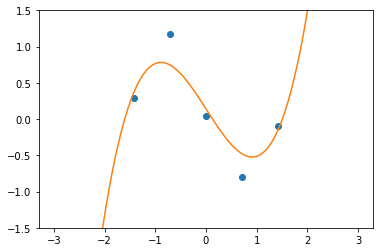

In [245]:
#M=3のときのグラフをプロット
x = np.linspace(-3, 3, 100)
plt.plot(z_train, y_train, 'o')
plt.plot(x, f(to_matrix(x)))
plt.ylim(-1.5, 1.5)
plt.show()

In [246]:
###多項式回帰の実装(M = 9)
#パラメータの初期化
w = np.random.rand(10)

train_z = standardize(x_train)

#学習データの行列を作成(多項式のMが2のとき)
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2, x ** 3, x**4, x ** 5, x ** 6, x** 7, x ** 8, x**9]).T

X = to_matrix(z_train)

#予測関数
def f(x):
    return np.dot(x, w)

#誤差関数(損失関数)
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

In [247]:
count = 0
error = MSE(X, y_train)
print('1回目の誤差:' + str(error))

while count < 2000:
    w = w - lr * np.dot(f(X) - y_train, X)
    current_error = MSE(X, y_train)
    diff = np.abs(error - current_error)
    error = current_error
    count += 1
    
    if count % 100 == 0:
        #ログ
        log = '{}回目の誤差:{}'
        print(log.format(count, current_error))

1回目の誤差:570.700496659178
100回目の誤差:0.7372196393725423
200回目の誤差:0.5537927274615051
300回目の誤差:0.4208837374962275
400回目の誤差:0.322511493868877
500回目の誤差:0.2485642155013859
600回目の誤差:0.1923642906792712
700回目の誤差:0.14932618768435543
800回目の誤差:0.1161951247291133
900回目の誤差:0.09059953651165452
1000回目の誤差:0.0707770241360037
1100回目の誤差:0.05539911094171024
1200回目の誤差:0.043454355532409186
1300回目の誤差:0.03416738701123003
1400回目の誤差:0.026941032385563713
1500回目の誤差:0.021313921815442907
1600回目の誤差:0.016928860006377597
1700回目の誤差:0.013508918959763264
1800回目の誤差:0.010839201415140496
1900回目の誤差:0.008752842724284077
2000回目の誤差:0.007120220611252357


In [248]:
#M=9のときの最終誤差
print('最終誤差:', error)

最終誤差: 0.007120220611252357


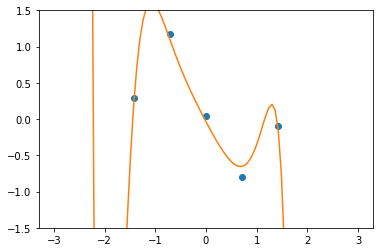

In [249]:
#M=9のときのグラフをプロット
x = np.linspace(-3, 3, 100)
plt.plot(z_train, y_train, 'o')
plt.plot(x, f(to_matrix(x)))
plt.ylim(-1.5, 1.5)
plt.show()